### Preparation

In [2]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
import time
import math

In [3]:
df = pd.read_csv('../data/curated_data/new_properties.csv')
df

,name,cost_text,coordinates,type,bond,features,unverified_features,desc,costs,beds,...,school,park,supermarket,cinema,postalcode,postcode,SA2,2021,Area Name,2026
0,8092Y/33 Rose Lane Melbourne VIC 3000,$60 per week,"[-37.8150137, 144.9538694]",Apartment / Unit / Flat,261.0,[],[],['. Close to Southern Cross Station. Available...,60.0,1,...,11,170,48,7,VIC 3000,3000,206041122.0,43823.0,Melbourne,"73,594"
1,602/118 Franklin Street Melbourne VIC 3000,$330,"[-37.8082052, 144.9589035]",Apartment / Unit / Flat,1320.0,[],[],['The exclusive address simply speaks for itse...,330.0,1,...,16,166,48,7,VIC 3000,3000,206041122.0,43823.0,Melbourne,"73,594"
2,1112/333-351 Exhibition Street Melbourne VIC 3000,$600 per week,"[-37.8078956, 144.9682873]",Apartment / Unit / Flat,2607.0,['Furnished'],[],['Positioned in this most favourable location ...,600.0,2,...,19,173,54,6,VIC 3000,3000,206041122.0,43823.0,Melbourne,"73,594"
3,3002/288 Spencer St Melbourne VIC 3000,$510,"[-37.813775, 144.9520948]",Apartment / Unit / Flat,2216.0,[],[],['This fantastic apartment located on the 30th...,510.0,2,...,10,108,44,6,VIC 3000,3000,206041122.0,43823.0,Melbourne,"73,594"
4,4/180 Little Collins Street Melbourne VIC 3000,$500 per week,"[-37.8138601, 144.9679067]",Apartment / Unit / Flat,2173.0,['Furnished'],[],['Enjoy what the renowned reputation The Georg...,500.0,1,...,13,146,49,7,VIC 3000,3000,206041122.0,43823.0,Melbourne,"73,594"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65943,14 Inverloch Parade Inverloch VIC 3996,$420 wk,"[-38.6287143, 145.7358082]",House,1820.0,"['Garden', 'Split System AC', 'Floorboards']","['Internal Laundry', 'Heating']","['This two bedroom, 1 bathroom home will surel...",420.0,2,...,0,0,0,0,VIC 3996,3996,205031087.0,9377.0,Foster,"9,320"
65944,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]",House,2065.0,"['Ensuite', 'Garden', 'Split System AC', 'Outd...",['Heating'],"[""Neat 3 bedroom home located in the immaculat...",475.0,3,...,0,0,0,0,VIC 3996,3996,205031093.0,26723.0,Wonthaggi - Inverloch,"27,692"
65945,Inverloch VIC 3996,$475 wk,"[-38.6314613, 145.7293638]",House,2065.0,"['Ensuite', 'Garden', 'Split System AC', 'Outd...",['Heating'],"[""Neat 3 bedroom home located in the immaculat...",475.0,3,...,0,0,0,0,VIC 3996,3996,205031087.0,9377.0,Foster,"9,320"
65946,64 Dixon Street Inverloch VIC 3996,Contact Agent,"[-38.6313719, 145.717275]",House,200.0,['Solar panels'],[],['- Street frontage with excellent exposure- A...,NaN,1,...,0,0,0,0,VIC 3996,3996,205031093.0,26723.0,Wonthaggi - Inverloch,"27,692"


In [4]:
def get_postalcode(name):
    return name[-8:].strip()
df['postalcode'] = df.name.apply(get_postalcode)  # extract postalcode from name

In [5]:
df = df[df['costs']<10000]

In [6]:
df_vic3000 = df.sample(n=30000)
df_vic3000['costs'].mean()
#df_vic3000 = df[:100] # Take first 100 apartments as examples which are all from VIC 3000

478.3469333333333

### EDA & Feature Engineering

/home/renhaow/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='costs', ylabel='Density'>

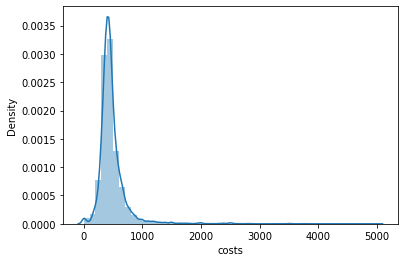

In [7]:
sns.distplot(df_vic3000['costs'])

In [50]:
df_vic3000.columns

Index(['name', 'cost_text', 'coordinates', 'type', 'bond', 'features',
       'unverified_features', 'desc', 'costs', 'beds', 'baths', 'parking',
       'lon', 'lat', 'revcoord', 'dis_to_melCBD', 'school', 'park',
       'supermarket', 'cinema', 'postalcode'],
      dtype='object')

In [51]:
df_vic3000.drop(['name','cost_text','coordinates','type','features','unverified_features','desc','lon','lat','revcoord','postalcode'],axis=1,inplace=True)
df_vic3000

d:\softwares\Anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,bond,costs,beds,baths,parking,dis_to_melCBD,school,park,supermarket,cinema
0,261.0,60.0,1,1,1,1424,11,170,48,7
1,1320.0,330.0,1,1,0,1241,16,166,48,7
2,2607.0,600.0,2,2,0,1692,19,173,54,6
3,2216.0,510.0,2,1,1,1612,10,108,44,6
4,2173.0,500.0,1,1,0,627,13,146,49,7
...,...,...,...,...,...,...,...,...,...,...
95,1420.0,355.0,1,1,0,1160,16,173,50,7
96,2390.0,550.0,2,1,1,1418,9,121,44,5
97,2824.0,650.0,2,2,0,1280,21,179,51,7
98,NaN,620.0,2,2,1,4543,25,60,11,4


#### Filling in missing feature values

In [55]:
df_vic3000.isnull().sum() 

bond             11
costs             2
beds              0
baths             0
parking           0
dis_to_melCBD     0
school            0
park              0
supermarket       0
cinema            0
dtype: int64

In [56]:
df_vic3000['bond'] = df_vic3000['bond'].transform(lambda x: x.fillna(x.median()))
df_vic3000['costs'] = df_vic3000['costs'].transform(lambda x: x.fillna(x.median())) 
# filling missing features with median

<ipython-input-56-06f54516f571>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vic3000['bond'] = df_vic3000['bond'].transform(lambda x: x.fillna(x.median()))


In [59]:
df_vic3000.isnull().sum() # check again

bond             0
costs            0
beds             0
baths            0
parking          0
dis_to_melCBD    0
school           0
park             0
supermarket      0
cinema           0
dtype: int64

### Feature Analysis

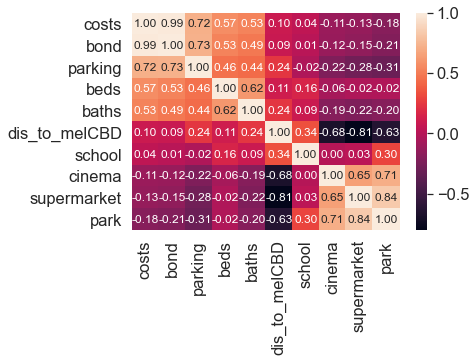

In [64]:
corrmat = df_vic3000.corr() # Draw corrmat and sort by corr
k = 10
cols = corrmat.nlargest(k,'costs')['costs'].index
c = np.corrcoef(df_vic3000[cols].values.T)
sns.set(font_scale=1.5)
h = sns.heatmap(c, annot=True, fmt='.2f', annot_kws={'size': 12}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to the heatmap, 'bond' is strongly correlated with 'costs'.'parking','beds','baths' also have relatively high correlation with 'costs'.

### Price forecasting

In [87]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

train_target = df_vic3000.costs.reset_index(drop=True)
train_data = df_vic3000.drop(['costs'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(train_data, train_target, test_size=0.1, random_state=42)
# split X_train,X_test,y_train,y_test for cross validation
kfolds = KFold(n_splits=10, random_state=42, shuffle=True)
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=[10,10.5,11,11.5,12,12.5,13,13.5,14,14.5,15,15.5,16], cv=kfolds))
ridge.fit(X_train,y_train)

Pipeline(steps=[('robustscaler', RobustScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. ,
       15.5, 16. ]),
                         cv=KFold(n_splits=10, random_state=42, shuffle=True)))])

In [88]:
scoring= 'neg_mean_squared_error'
result= np.sqrt(-cross_val_score(ridge, X_train, y_train, cv=kfolds, scoring=scoring)) # calculate RMSE score
print(result,"\n",result.mean(),"\n","Ridge Regression: %.3f" %result.std())

[111.16179035  36.11088267  54.50360513  68.88727042 130.55631433
  42.26208683 130.22227248 182.61053384  37.07228398  47.84431224] 
 84.12313522771194 
 Ridge Regression: 48.383
